## Importing the required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


/tmp/ipykernel_12869/1920927039.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Import and explore data

In [2]:
df = pd.read_csv('rent.csv')


In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


#### There are no non-null values

## Visualising the data

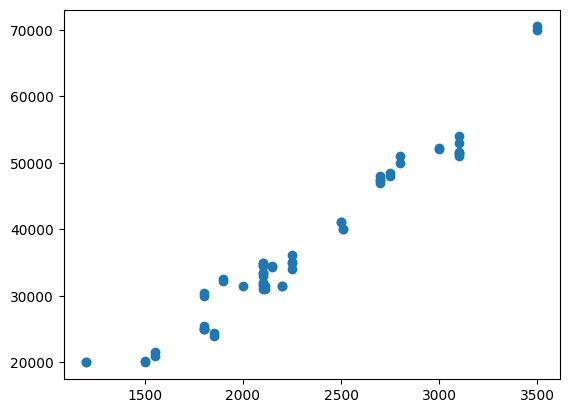

In [6]:
X = df.iloc[:, 0]
Y = df.iloc[:, 1]

fig, ax = plt.subplot(figsize=(10, 6))
ax.scatter(x = X, y =Y, color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)

In [7]:
# Building the model
m = 0
c = 0

L = 0.00000001  #learning Rate
epochs = 100  

n = len(X)

# Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # predicting Y using m and c
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m
    c = c - L * D_c

print (m, c)

16.54069047036069 0.005667113526720579


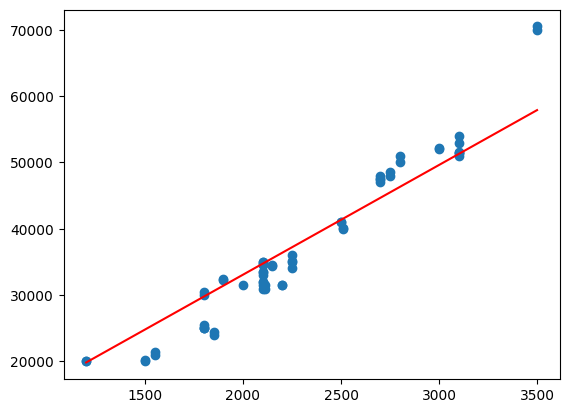

In [8]:
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

### Evaluation

In [9]:
from sklearn.metrics import r2_score

r2_score(Y, Y_pred)

0.9003440555035844

R2 score of 0.90 which tells the model provides accurate results 90% of the time